# Output

Outputing is handled in `chemcomp/chemcomp/planets/_planet_class.py` with the class `DataObject`.

Every run creates a `.h5` file with the following structure:

```
   .
   ├── disk              # all the disk quantities
       ├── [quantities]
   ├── planet            # all the planet quantities
       ├── [quantities]
       ├── units
   ├── acc               # accretion related quantities
       ├── [quantities]
```

The `print_params()` inside the Planet class is the function that deals with IO operations. This function is called in the mainloop (`grow_mass()`).

The `print_params()` function calls the save function of the `DataObject` that belongs to the `Planet`. All the saving arithmetics (how often we want outputs, etc.) are handled therein.

It is important to understand that the `DataObject` object owns a reference to the `Planet` (and therefore also to the `Disk` object and the accretion objects). The save function of the `DataObject` has therefore full access (at all times) to the current disk and planet quantities.


## Get familiar with the output

`.h5` files are self documented files!

In [1]:
import h5py
file = "Bert.h5"
with h5py.File(file, "r") as f:
    print(dict(f["planet"]).keys())
    print(dict(f["disk"]).keys())

dict_keys(['M', 'M_a', 'M_c', 'M_z_gas', 'M_z_peb', 'M_z_pla', 'T', 'a_p', 'comp_a', 'comp_c', 'fSigma', 'fSigma_kanagawa', 'gamma_norm', 'gamma_tot', 'm_dot_a_chem_gas', 'm_dot_a_chem_peb', 'm_dot_a_chem_pla', 'm_dot_a_gas', 'm_dot_a_peb', 'm_dot_a_pla', 'm_dot_c_chem_gas', 'm_dot_c_chem_peb', 'm_dot_c_chem_pla', 'm_dot_c_gas', 'm_dot_c_peb', 'm_dot_c_pla', 'm_dot_gas', 'm_dot_peb', 'm_dot_pla', 'peb_iso', 'pebble_flux', 'regime_gas', 'regime_peb', 'regime_pla', 'sigma_g', 'sigma_peb', 't', 'tau_m', 'units'])
dict_keys(['T', 'T_irr', 'T_visc', 'a_1', 'cum_pebble_flux', 'f_m', 'm_dot', 'm_dot_components', 'mu', 'peb_iso', 'pebble_flux', 'r', 'r_i', 'sigma_dust', 'sigma_dust_components', 'sigma_g', 'sigma_g_components', 'sigma_pla', 'sigma_pla_components', 'stokes_number_df', 'stokes_number_drift', 'stokes_number_frag', 'stokes_number_pebbles', 'stokes_number_small', 't', 'vr_dust', 'vr_gas'])


Units for planets can be retrieved by

In [2]:
with h5py.File(file, "r") as f:
     print(dict(f["planet"]["units"].attrs))

{'CLASS': b'GROUP', 'M': b'u.g', 'M_a': b'u.g', 'M_c': b'u.g', 'M_z_gas': b'u.g', 'M_z_peb': b'u.g', 'M_z_pla': b'u.g', 'T': b'u.K', 'TITLE': b'units', 'VERSION': b'1.0', 'a_p': b'u.cm', 'comp_a': b'u.g', 'comp_c': b'u.g', 'gamma_tot': b'u.g*u.cm**2/u.s**2', 'm_dot_a_chem_gas': b'u.g/u.s', 'm_dot_a_chem_peb': b'u.g/u.s', 'm_dot_a_chem_pla': b'u.g/u.s', 'm_dot_a_gas': b'u.g/u.s', 'm_dot_a_peb': b'u.g/u.s', 'm_dot_a_pla': b'u.g/u.s', 'm_dot_c_chem_gas': b'u.g/u.s', 'm_dot_c_chem_peb': b'u.g/u.s', 'm_dot_c_chem_pla': b'u.g/u.s', 'm_dot_c_gas': b'u.g/u.s', 'm_dot_c_peb': b'u.g/u.s', 'm_dot_c_pla': b'u.g/u.s', 'm_dot_gas': b'u.g/u.s', 'm_dot_peb': b'u.g/u.s', 'm_dot_pla': b'u.g/u.s', 'peb_iso': b'u.g', 'pebble_flux': b'u.g/u.s', 'sigma_g': b'u.g/u.cm**2', 'sigma_peb': b'u.g/u.cm**2', 't': b'u.s', 'tau_m': b'u.s'}


## Planet

We start this tutorial by plotting some planetary quantities. Planetary quantities can be conviniently plotted using the GrowthPlot class

In [3]:
from chemcomp.helpers import GrowthPlot
import numpy as np
import tables
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import os

In [4]:
files = ['Bert.h5']
out = ['Bert']
chemcomp = GrowthPlot(files=files, out=out)

shortcut to the data of the planet Bert. If we have multiple files and out, we would have multiple keys in plot.data

In [5]:
bert = chemcomp.data['Bert']

List the output parameters available:

In [6]:
print(bert.keys())

dict_keys(['M', 'M_a', 'M_c', 'M_z_gas', 'M_z_peb', 'M_z_pla', 'T', 'a_p', 'comp_a', 'comp_c', 'fSigma', 'fSigma_kanagawa', 'gamma_norm', 'gamma_tot', 'm_dot_a_chem_gas', 'm_dot_a_chem_peb', 'm_dot_a_chem_pla', 'm_dot_a_gas', 'm_dot_a_peb', 'm_dot_a_pla', 'm_dot_c_chem_gas', 'm_dot_c_chem_peb', 'm_dot_c_chem_pla', 'm_dot_c_gas', 'm_dot_c_peb', 'm_dot_c_pla', 'm_dot_gas', 'm_dot_peb', 'm_dot_pla', 'peb_iso', 'pebble_flux', 'regime_gas', 'regime_peb', 'regime_pla', 'sigma_g', 'sigma_peb', 't', 'tau_m', 'solar', 'elem_c', 'elem_a', 'elem_tot', 'mol_c', 'mol_a', 'mol_tot', 'CH_a', 'CH_normed_a', 'OH_a', 'OH_normed_a', 'FeH_a', 'FeH_normed_a', 'SH_a', 'SH_normed_a', 'MgH_a', 'MgH_normed_a', 'SiH_a', 'SiH_normed_a', 'NaH_a', 'NaH_normed_a', 'KH_a', 'KH_normed_a', 'NH_a', 'NH_normed_a', 'AlH_a', 'AlH_normed_a', 'TiH_a', 'TiH_normed_a', 'VH_a', 'VH_normed_a', 'HH_a', 'HH_normed_a', 'HeH_a', 'HeH_normed_a', 'CO_a', 'SiO_a', 'CO_normed_a', 'SiO_normed_a', 'CH_c', 'CH_normed_c', 'OH_c', 'OH_norme

Look at the mass for example (each element of the list is one saved snapshot)

In [7]:
bert['a_p']

<Quantity [30.        , 30.        , 30.        , 30.        , 30.        ,
           30.        , 30.        , 30.        , 30.        , 30.        ,
           30.        , 30.        , 29.99561621, 29.98434365, 29.95790824,
           29.9070103 , 29.8227391 , 29.69871482, 29.53236331, 29.32198884,
           29.06409848, 28.75604269, 28.38474596, 27.92863513, 27.40679529,
           26.84210885, 26.2368344 , 25.59410725, 24.9160276 , 24.20440186,
           23.4608076 , 22.68660122, 21.8830191 , 21.16665752, 20.90481825,
           20.75706885, 20.65168491, 20.56997567, 20.51146329, 20.46600851,
           20.42840144, 20.4006484 , 20.39002228, 20.38005739, 20.37009631,
           20.3601391 , 20.35018549, 20.3402352 , 20.33028826, 20.32034474,
           20.31040465, 20.30046797, 20.29053462, 20.28060452, 20.27067754,
           20.26075355, 20.25083243, 20.24091405, 20.23099828, 20.22108499,
           20.21117406, 20.20126536, 20.19135879, 20.18145423, 20.17155159,
           2

get in terms of jupitermasses (head over to astropy.units for more info)

In [8]:
bert['M'].to(u.jupiterMass)

<Quantity [8.09778026e-05, 8.09778026e-05, 8.09778026e-05, 8.09778026e-05,
           8.09778026e-05, 8.09778026e-05, 8.09778026e-05, 8.09778026e-05,
           8.09778026e-05, 8.09778026e-05, 8.09778026e-05, 8.09778026e-05,
           2.09103952e-04, 5.36920498e-04, 1.15670288e-03, 2.09308904e-03,
           3.35068148e-03, 4.90316545e-03, 6.70214670e-03, 8.77139384e-03,
           1.10859435e-02, 1.37682596e-02, 1.78644534e-02, 2.21615649e-02,
           2.51273802e-02, 2.82486503e-02, 3.14816644e-02, 3.48067945e-02,
           3.81868078e-02, 4.16614560e-02, 4.51920383e-02, 4.88045303e-02,
           5.24917964e-02, 5.62498447e-02, 6.03675005e-02, 6.46424881e-02,
           6.92070231e-02, 7.38592520e-02, 7.83738081e-02, 8.30257418e-02,
           8.77887247e-02, 2.10003037e-01, 6.01300966e-01, 1.02114575e+00,
           1.47166377e+00, 1.66288085e+00, 1.67596712e+00, 1.69481063e+00,
           1.71920437e+00, 1.74871690e+00, 1.78210825e+00, 1.81862418e+00,
           1.85321649e+00

The data has been saved at:

In [9]:
bert['t']

<Quantity [1.000000e-06, 1.000000e-06, 5.001000e-03, 1.000100e-02,
           1.500100e-02, 2.000100e-02, 2.500100e-02, 3.000100e-02,
           3.500100e-02, 4.000100e-02, 4.500100e-02, 5.000100e-02,
           5.500100e-02, 6.000100e-02, 6.500100e-02, 7.000100e-02,
           7.500100e-02, 8.000100e-02, 8.500100e-02, 9.000100e-02,
           9.500100e-02, 1.000010e-01, 1.050010e-01, 1.100010e-01,
           1.150010e-01, 1.200010e-01, 1.250010e-01, 1.300010e-01,
           1.350010e-01, 1.400010e-01, 1.450010e-01, 1.500010e-01,
           1.550010e-01, 1.600010e-01, 1.650010e-01, 1.700010e-01,
           1.750010e-01, 1.800010e-01, 1.850010e-01, 1.900010e-01,
           1.950010e-01, 2.000010e-01, 2.050010e-01, 2.100010e-01,
           2.150010e-01, 2.200010e-01, 2.250010e-01, 2.300010e-01,
           2.350010e-01, 2.400010e-01, 2.450010e-01, 2.500010e-01,
           2.550010e-01, 2.600010e-01, 2.650010e-01, 2.700010e-01,
           2.750010e-01, 2.800010e-01, 2.850010e-01, 2.900010e

Now lets plot the mass as a function of location (classical Growthtrack)

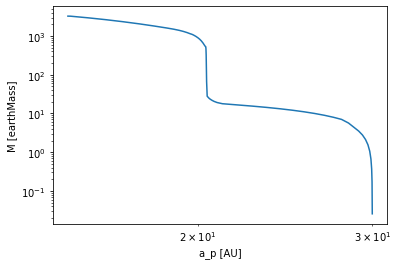

In [10]:
plt.loglog(bert['a_p'].value, bert['M'].value)
plt.xlabel(f'a_p [{bert["a_p"].unit}]')
plt.ylabel(f'M [{bert["M"].unit}]')
plt.show()

Alternative way of plotting (using a builtin function):

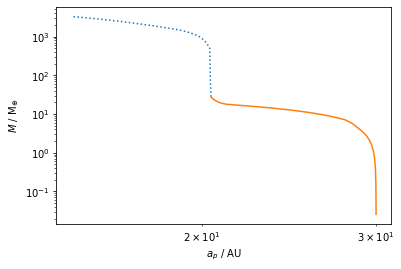

In [11]:
fig, ax = plt.subplots(1,1)
chemcomp.plot_data(quantities = [ "a_p","M"], out=out, fig=fig, ax=ax)
plt.show()

## Disk

We now turn to disk plots. There is currently no helper class for disk quantities. But don't worry, its quite easy to access the disk data!

Lets first check what kind of output we get for the disk:

In [12]:
with tables.open_file(files[0], mode='r') as f:
    quant= [q for q in dir(f.get_node('/disk')) if q[0]!='_']

# List all disk output:    
print(quant)

['T', 'T_irr', 'T_visc', 'a_1', 'cum_pebble_flux', 'f_m', 'm_dot', 'm_dot_components', 'mu', 'peb_iso', 'pebble_flux', 'r', 'r_i', 'sigma_dust', 'sigma_dust_components', 'sigma_g', 'sigma_g_components', 'sigma_pla', 'sigma_pla_components', 'stokes_number_df', 'stokes_number_drift', 'stokes_number_frag', 'stokes_number_pebbles', 'stokes_number_small', 't', 'vr_dust', 'vr_gas']


Lets now plot the surface density of gas and waterice

In [13]:
AU = (1*u.au).cgs.value  # define the astronomical unit conversion from cgs
Myr = (1*u.Myr).cgs.value # define the Megayear unit conversion from cgs
with tables.open_file(files[0], mode='r') as f:
    sigma_g = np.array(f.root.disk.sigma_g)
    sigma_dust_components = np.array(f.root.disk.sigma_dust_components)
    t = np.array(f.root.disk.t)/Myr # convert to Myr
    r = np.array(f.root.disk.r)/AU  # convert to AU

Each quantity array (besides t, r and r_i) has the following shape: (snapshot, radius, optional dimensions). Lets test this:

In [14]:
print('time has the shape of the number of available snapshots: ',t.shape)
print('radius has the shape of the grid: ',r.shape)
print('sigma_g is available for every snapshot with one value for each gridcell: ',sigma_g.shape)
print('sigma_dust_components is available for every snapshot with multiple values for each gridcell (every species, molecules and elements): ',sigma_dust_components.shape)

time has the shape of the number of available snapshots:  (34,)
radius has the shape of the grid:  (500,)
sigma_g is available for every snapshot with one value for each gridcell:  (34, 500)
sigma_dust_components is available for every snapshot with multiple values for each gridcell (every species, molecules and elements):  (34, 500, 2, 19)


Lets now extract the water ice (see chemistry doc):

In [15]:
sigma_water_ice = sigma_dust_components[:,:,1,7] 

Lets list the available timesnapshots and search for 0.5 Myr:

In [16]:
print('available snapshots: ',t)
snapshot = np.where(np.isclose(t,0.5))[0][0]
print('index of the 500kyr snapshot: ',snapshot)

available snapshots:  [1.000000e-06 1.000000e-06 1.000010e-01 2.000010e-01 3.000010e-01
 4.000010e-01 5.000010e-01 6.000010e-01 7.000010e-01 8.000010e-01
 9.000010e-01 1.000001e+00 1.100001e+00 1.200001e+00 1.300001e+00
 1.400001e+00 1.500001e+00 1.600001e+00 1.700001e+00 1.800001e+00
 1.900001e+00 2.000001e+00 2.100001e+00 2.200001e+00 2.300001e+00
 2.400001e+00 2.500001e+00 2.600001e+00 2.700001e+00 2.800001e+00
 2.900001e+00 3.000001e+00 3.100001e+00 3.118821e+00]
index of the 500kyr snapshot:  6


And do some basic plotting for the 500kyr snapshot:

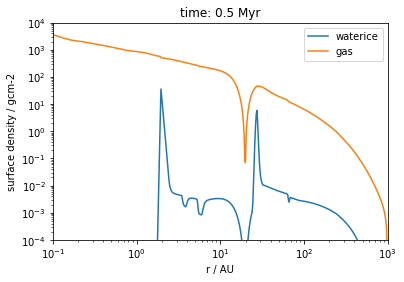

In [17]:
plt.loglog(r, sigma_water_ice[snapshot], label = 'waterice')
plt.loglog(r, sigma_g[snapshot], label = 'gas')
plt.title('time: {:.1f} Myr'.format(t[snapshot]))
plt.xlim([0.1,1000])
plt.ylim([1e-4,1e4])
plt.ylabel('surface density / gcm-2')
plt.xlabel('r / AU')
plt.legend()
plt.show()

We can see that the planet has carved a gap into the disk, but some water still diffuses through the gap!

## How do I understand what these quantities mean? 

If you want to understand the meaning of the quantities available in the output you should consider to check the `DataObject` output class in `chemcomp/planets/_planet_class.py`!

The outputnames are identical to in-code names. Therefore, search the code for a quantity and you will find what the quantity does.

**Additional info for planet data:**

Some planet data is postprocessed in the `GrowthPlot` class. You should check the `composite_data` function that takes care of combining basic output for postprocessing purposes. Feel free to extend it!

# Loading a parameterrun 

We are not going to look at parameterprobing. If you used the `pipeline.py` script with a job file and probed a few parameters you should be able to conviniently load the planet data using the `GrowthPlot` object.

Lets consider the following job file (`jobs/paper_1_grid_thorngren.yaml`):

```yaml
par_1:
  name: ALPHA
  vals: [ 1.0e-4,5.0e-4,1.0e-3 ]
  section: config_disk
par_2:
  name: DTG_total
  vals: [0.01,0.015,0.02,0.025]
  section: config_disk
par_3:
  name: begin_photoevap
  vals: [1.0,2.0,3.0]
  section: config_disk
par_4:
  name: a_p
  vals: [1, 2, 3, 5, 10, 15, 20, 25, 30]
  section: config_planet
par_5:
  name: t_0
  arange: [ 0.05, 0.5, 0.1 ]
  section: config_planet
output_name: thorngren
double_disks: True
save_interval: 5e6
```

This is by chance the Thorngren run configuration of the Thorngren Plots in Schneider & Bitsch (2021a)

To conviniently load the data we will use the `slugs_<joboutputname>.dat` and the `plot_names_<joboutputname>.dat` files. These files hold the names of each `.h5` file generated for every single planet and a corresponging readable name respectively.

Lets now load the data:

In [18]:
name = "thorngren_evap"
output_path = "/Volumes/EXTERN/Simulations/chemcomp/output"
with open(os.path.join(output_path, "slugs_{}.dat".format(name))) as f:
    out = f.read().split('\n')  # read the outputnames

with open(os.path.join(output_path, "plot_names_{}.dat".format(name))) as f:
    labels = f.read().split('\n')
    plotlabels = dict(zip(out, labels))   # read the readable plotlabels corresponding to each outputfile

files = [os.path.join(output_path, "{}".format(o) + ".h5") for o in out]   # generate a list of files to be read 
chemcomp = GrowthPlot(files=files, out=out, plotlabels=plotlabels, close_plots=True)  # create the Plot object

We now hold a gigantic Plot object that contains a lot of data in `Plot.data`. We can see the available simulations (and therefore keys to `Plot.data`) in `Plot.out`. For convenience we will only display the first 10:

In [19]:
chemcomp.out[:10]

['thorngren-evap-0-0001-0-01-1-0-1-0-0-05',
 'thorngren-evap-0-0001-0-01-1-0-1-0-0-15000000000000002',
 'thorngren-evap-0-0001-0-01-1-0-1-0-0-25000000000000006',
 'thorngren-evap-0-0001-0-01-1-0-1-0-0-35000000000000003',
 'thorngren-evap-0-0001-0-01-1-0-1-0-0-45000000000000007',
 'thorngren-evap-0-0001-0-01-1-0-2-0-0-05',
 'thorngren-evap-0-0001-0-01-1-0-2-0-0-15000000000000002',
 'thorngren-evap-0-0001-0-01-1-0-2-0-0-25000000000000006',
 'thorngren-evap-0-0001-0-01-1-0-2-0-0-35000000000000003',
 'thorngren-evap-0-0001-0-01-1-0-2-0-0-45000000000000007']

We can now create dictionaries that hold the information about the parameters that we probed:

In [20]:
# create empty dictionaries:
alpha_dict = {}
DTG_dict = {}
lifetime_dict = {}
t_0_dict = {}
a_p_dict = {}

# loop over all plotlabels:
for k, v in plotlabels.items():
    # create a dict for each output that contains the parameters extracted from plotlables
    par = {val.split(":")[0]: val.split(":")[1:] for val in v.split(", ")}
    # get the actual parameters and save them to the dictionaries as floats
    alpha_dict[k] = float(par.get("ALPHA", 0)[0])
    DTG_dict[k] = float(par.get("DTG_total", 0)[0])
    lifetime_dict[k] = float(par.get("begin_photoevap", 0)[0])
    a_p_dict[k] = float(par.get("a_p", 0)[0])    
    t_0_dict[k] = float(par.get("t_0", 0)[0])    

Lets now get the parameters of the first entry in Plot.out:

In [21]:
o = chemcomp.out[0]
print(f' Output: {o}\n alpha: {alpha_dict[o]}\n dust to gas ratio: {DTG_dict[o]}\n disklifetime: {lifetime_dict[o]}\n planet seeded at t={t_0_dict[o]} and a_p={a_p_dict[o]}')

 Output: thorngren-evap-0-0001-0-01-1-0-1-0-0-05
 alpha: 0.0001
 dust to gas ratio: 0.01
 disklifetime: 1.0
 planet seeded at t=0.05 and a_p=1.0


Now lets do a plot the final mass vs final orbital position of all the planets that formed in a disk with alpha of 1e-4

In [22]:
M = [chemcomp.data[o]['M'][-1].to(u.earthMass).value for o in chemcomp.out if alpha_dict[o]==1e-4]
r = [chemcomp.data[o]['a_p'][-1].to(u.au).value for o in chemcomp.out if alpha_dict[o]==1e-4]

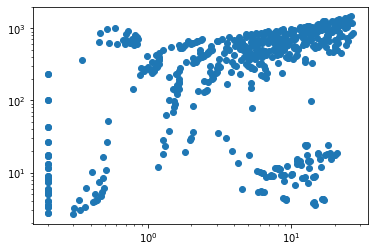

In [23]:
plt.scatter(r, M)
plt.xscale('log')
plt.yscale('log')
plt.show()